# **$\color{green}{\text{Student Name: Aysha AlRemeithi}}$**


$\color{blue}{\text{Batch 3 - Group B (2022) }}$

In [10]:
#standard imports
import numpy as np
import matplotlib.pyplot as plt

In [11]:
#dynamics:
A = np.matrix([[1]])

#process noise variance:
V = np.matrix([[9]])

#measurement model:
H = np.matrix([[1]])

#measurement noise variance:
W = np.matrix([[25]])

In [12]:
#these measurements start at time k=1,2,3.... 
# note that the first element is zero, it's never used (corresponds to z[0])

measurements_z = [np.nan, 17.8, 22.6, 30.2, 37.3, 46.2, 49.5, 44.6, 50.3, 56.3, 51.6]
inputs_uf = [10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10] #dk= 10
m = [7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7]

In [13]:
hat_x_m = np.mat([[20]])  # prior estimate of the state
P_m = np.mat([[25]])  # variance of prior

In [14]:
numSteps = 10  # how many time steps will we run the estimator?
# where we'll store the history our estimate
hist_hat_x_m = np.zeros([numSteps+1])
# where we'll store the history our estimate's variance
hist_P_m_diag = np.zeros([numSteps+1])  

#save the prior:
hist_hat_x_m[0] = hat_x_m[0]

hist_P_m_diag[0] = P_m[0]


for k in np.arange(1,numSteps+1):
    #step 1: Kalman filter prediction
    #our current input u(k-1):
    uf = inputs_uf[k-1] - m[k-1]
    u = np.matrix([[uf]])
    
    hat_x_p = A*hat_x_m + u
    P_p = A**2*P_m + V
    
    #step 2: Kalman filter measurement update:
    #our current measurement 
    z = measurements_z[k]
    
    K = P_p @ H.T @ np.linalg.inv(H @ P_p @ H.T + W)
    hat_x_m = hat_x_p + K @ (z - H @ hat_x_p)
    P_m = (np.eye(1) - K @ H) @ P_p @ (np.eye(1) - K @ H).T + K @ W @ K.T
    
    #store the variables for plotting. Don't modify the below lines:
    hist_hat_x_m[k] = hat_x_m[0]
   
    hist_P_m_diag[k] = P_m[0]

In [15]:
hist_hat_x_m

array([20.        , 20.00338983, 22.80833333, 27.81781218, 33.73358943,
       40.96940069, 46.44012115, 47.27893033, 50.28833685, 54.63282623,
       54.93964473])

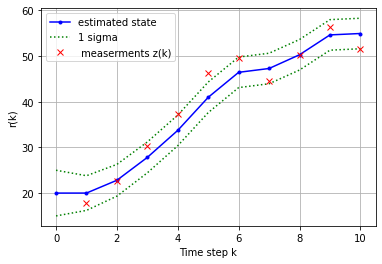

In [16]:
fig, ax = plt.subplots(1,1,sharex=True)

ax.plot(hist_hat_x_m[:],'b.-',label="estimated state")
ax.plot(hist_hat_x_m[:]+np.sqrt(hist_P_m_diag[:]),'g:',label="1 sigma")
ax.plot(hist_hat_x_m[:]-np.sqrt(hist_P_m_diag[:]),'g:',)
ax.plot(measurements_z,'rx',label=" measerments z(k)")
ax.set_ylabel('r(k)')
ax.set_xlabel('Time step k')
ax.legend()
ax.grid(True)

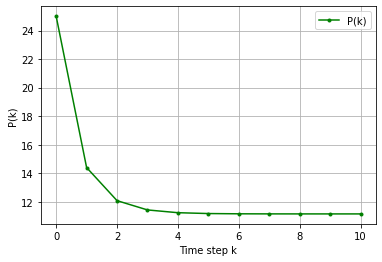

In [17]:
fig, ax = plt.subplots(1,1,sharex=True)

ax.plot(hist_P_m_diag[:],'g.-',label="P(k)")
ax.set_xlabel('Time step k')
ax.set_ylabel('P(k)')
ax.legend()
ax.grid(True)